#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [297]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('SalariesX.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


In [298]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

# Task 1:

In [299]:
print('the dataset has', len(df.columns), 'rows')
print('the dataset has',len(df), 'columns')

the dataset has 12 rows
the dataset has 148654 columns


In [300]:
print('the data types in each column:\n', df.dtypes)

the data types in each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object


In [301]:
print('the null values in each column:\n', df.isnull().sum())

the null values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


# Task 2:

In [302]:
print('mean of the salaries:', np.mean(df['TotalPayBenefits']))
print('median of the salaries:', np.median(df['TotalPayBenefits']))
print('mode of the salaries:', sp.stats.mode(df['TotalPayBenefits'])[0])

mean of the salaries: 93692.55481056681
median of the salaries: 92404.09
mode of the salaries: 7959.18


In [303]:
max_value = df['TotalPayBenefits'].max()
min_value = df['TotalPayBenefits'].min()
print('max value:',max_value)
print('min value:',min_value)

max value: 567595.43
min value: -618.13


In [304]:
print('the range is equal to the maximum value minus the minimum value which equals to', max_value - min_value)

the range is equal to the maximum value minus the minimum value which equals to 568213.56


In [305]:
print('the standard deviation is:', np.std(df['TotalPayBenefits']))

the standard deviation is: 62793.32227587333


# Task 3:

In [306]:
# as we have seen from the previos tasks there is only 5 columns where we must handle missing values
# basepay, overtimepay, otherspay, benefits, and notes
# we will start from the end

In [307]:
# handeling the nulls in the notes column
df['Notes'] = df['Notes'].fillna('No Notes')

In [308]:
# handeling the nulls in the benefits column
df['Benefits'] = df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'])

In [309]:
# handeling the nulls in the otherpay, the totalpay, and the overtimepay columns
df['OtherPay'] = df['OtherPay'].fillna(df['TotalPay'] - df['OvertimePay'] - df['BasePay'])
df['OvertimePay'] = df['OvertimePay'].fillna(df['TotalPay'] - df['OtherPay'] - df['BasePay'])
df['BasePay'] = df['BasePay'].fillna(df['TotalPay'] - df['OtherPay'] - df['OvertimePay'])

In [310]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             4
OvertimePay         4
OtherPay            4
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
dtype: int64

In [311]:
# as we can see here there are 4 rows that are still null, so we go to check them in the data

In [312]:
df[df['OtherPay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,No Notes,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,No Notes,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,No Notes,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,No Notes,San Francisco


In [313]:
# we can see that these nulls are almost completely empty,
# there are no employee name or job title in these null values
# so we will delete them from the data

In [314]:
df = df.dropna()
display(df.head())
df.isnull().sum()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,No Notes,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,No Notes,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,No Notes,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,No Notes,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,No Notes,San Francisco


Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
dtype: int64

# Task 4:

<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

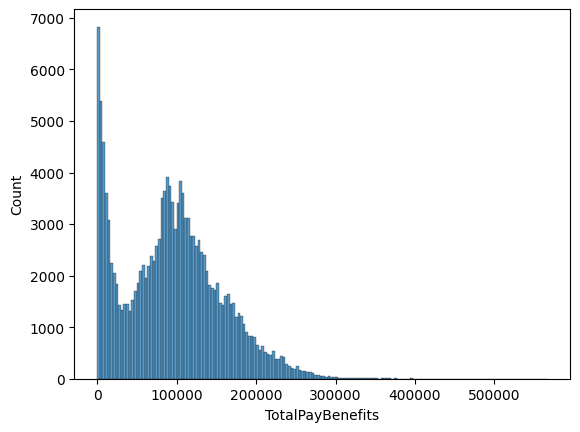

In [315]:
sns.histplot(df['TotalPayBenefits'])

([<matplotlib.patches.Wedge at 0x7e5a993107c0>],
 [Text(-1.1, 1.3471114790620887e-16, 'San Francisco')])

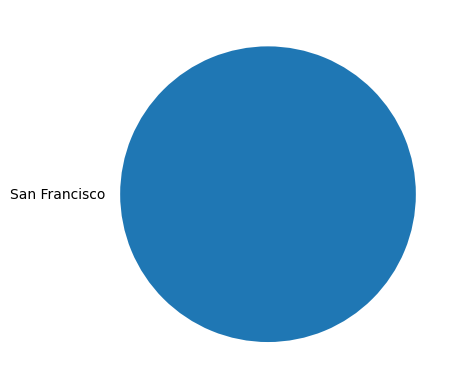

In [316]:
plt.pie(list(df['Agency'].value_counts()),
        labels=df['Agency'].unique())

In [317]:
# we can see from the data, that there is only one department and it's the San Francisco department

# Task 5:

In [318]:
grouped_data = df.groupby(['JobTitle']).mean()
grouped_data = grouped_data.drop(['Id', 'Year'], axis=1)
grouped_data = grouped_data.sort_values('TotalPayBenefits', ascending=False)

<ipython-input-318-92ad4c4c5c21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['JobTitle']).mean()


In [319]:
grouped_data

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
JobTitle,,,,,,
Chief Investment Officer,257340.000000,0.0,82313.700000,96570.660000,339653.700000,436224.360000
Chief of Police,309767.683333,0.0,19415.963333,82548.620000,329183.646667,411732.266667
"Chief, Fire Department",304232.340000,0.0,21739.343333,82893.643333,325971.683333,408865.326667
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,199119.150000,0.0,200092.125000,0.000000,399211.275000,399211.275000
"Gen Mgr, Public Trnsp Dept",297769.413333,0.0,0.000000,82927.026667,297769.413333,380696.440000
...,...,...,...,...,...,...
SPECIAL ASSISTANT XIV,673.800000,0.0,0.000000,0.000000,673.800000,673.800000
"BOARD/COMMISSION MEMBER, GROUP III",638.787879,0.0,0.000000,0.000000,638.787879,638.787879
"BdComm Mbr, Grp2,M=$25/Mtg",263.766129,0.0,0.000000,211.281613,263.766129,475.047742


In [320]:
# after grouping the data by the job title, we can see that Chief Investment Officer is the most paying job including benefits

# Task 6:

Text(0, 0.5, 'Overtime Pay')

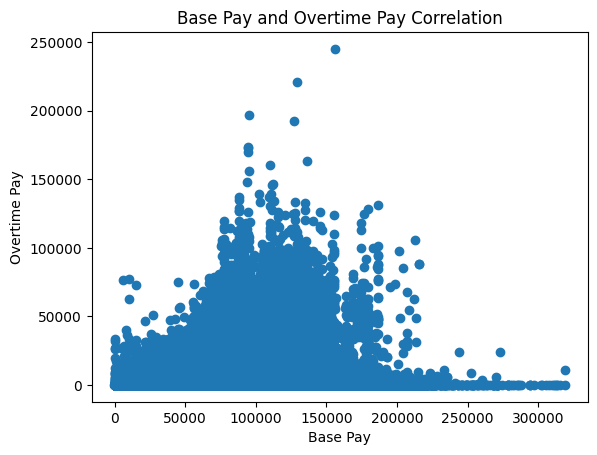

In [321]:
plt.scatter(df['BasePay'], df['OvertimePay'])
plt.title('Base Pay and Overtime Pay Correlation')
plt.xlabel('Base Pay')
plt.ylabel('Overtime Pay')

In [322]:
# we can see that the people who work overtime do not earn more to their base paying salary

# Task 7:

##### from the previous analysis we have explained the mean, median, mode and some other nuemeric information about the data, we have determined that the top earner employees are in managing roles, we have also discoverd that not all employees who work overtime are top earners.